In [6]:
import pandas as pd
from sklearn import linear_model, tree, neural_network, preprocessing
import numpy as np
import random
import math
from datetime import datetime
from matplotlib import pyplot as plt
import copy

In [7]:
ord_enc = preprocessing.OrdinalEncoder()
#Import the data set and remove the rows with missing values
metro_data = pd.read_csv('../datasets/Metro_Interstate_Traffic_Volume.csv')

#transform the categorical holiday variable into a encoded variable.
metro_data["holiday"] = ord_enc.fit_transform(metro_data[["holiday"]])
# print(metro_data["holiday"].value_counts())


metro_data["weather_main"] = ord_enc.fit_transform(metro_data[["weather_main"]])
# print(metro_data["weather_main"].value_counts())

metro_data["weather_description"] = ord_enc.fit_transform(metro_data[["weather_description"]])
# print(metro_data["weather_description"].value_counts())

# metro_data["date_time"] = ord_enc.fit_transform()
# print(metro_data["weather_description"].value_counts())
metro_data['time'] = pd.to_datetime(metro_data['date_time']).dt.time
metro_data['time'] = ord_enc.fit_transform(metro_data[['time']])
# print(metro_data['time'].value_counts())
# metro_data[]
metro_data['day'] = pd.to_datetime(metro_data['date_time']).dt.day
metro_data['month'] = pd.to_datetime(metro_data['date_time']).dt.month
metro_data['year'] = pd.to_datetime(metro_data['date_time']).dt.year
metro_data.drop('date_time', axis=1)

# print(metro_data)
metro_data = metro_data[['traffic_volume',
                        'holiday',
                        'temp', #this one
                        'rain_1h', #this one
                        'snow_1h', #this one
                        'clouds_all',
                        'weather_main',
                        'weather_description',
                        'day',
                        'month',
                        'year',
                        'time']]
# print(metro_data)
npdata = metro_data.to_numpy()
rng1 = np.random.default_rng(12345)
npdata = rng1.choice(npdata, 500)
print(npdata)

[[8.3200e+02 7.0000e+00 2.8975e+02 ... 5.0000e+00 2.0170e+03 4.0000e+00]
 [2.3970e+03 7.0000e+00 2.6756e+02 ... 1.2000e+01 2.0130e+03 1.2000e+01]
 [4.2660e+03 7.0000e+00 2.8150e+02 ... 1.0000e+01 2.0170e+03 1.0000e+01]
 ...
 [3.3000e+02 7.0000e+00 2.9049e+02 ... 6.0000e+00 2.0150e+03 2.0000e+00]
 [3.8380e+03 7.0000e+00 3.0058e+02 ... 8.0000e+00 2.0170e+03 1.8000e+01]
 [5.2070e+03 7.0000e+00 2.7649e+02 ... 4.0000e+00 2.0170e+03 1.4000e+01]]


In [8]:
random.seed(50)
test_indices = np.unique(np.array([random.randint(0,npdata.shape[0]-1) for k in range(0,math.ceil(0.2*npdata.shape[0]))]))
# print(test_indices)
test_data = npdata[test_indices, :]
test_X = test_data[:,1:]
test_transformer = preprocessing.MinMaxScaler().fit(test_X)
normalized_test_X = test_transformer.transform(test_X)
real_mpg = test_data[:, 0]

mu = 0
variance = 0.001
features = [[1], [2], [3], [1,2], [1,3], [2,3], [1,2,3]] 
percentages = np.arange(0,0.1,0.01)
iterations = 100

results = np.zeros([iterations, test_X.shape[0]])
output_variances = np.zeros(percentages.size)
plot_matrix = np.zeros([len(features), percentages.size])

for j in range(0, len(features)):
    k = 0
    for percentage in percentages:
        rng = np.random.default_rng(12345)
        for i in range(0, iterations):
            data = copy.deepcopy(npdata)
            training_data = np.delete(data, test_indices, axis=0)
            rows = training_data.shape[0]
            noise_indices = rng.choice(rows-1, math.ceil(percentage*rows), replace=False)
            training_X = training_data[:, 1:]
            training_transformer = preprocessing.StandardScaler().fit(training_X)
            normalized_training_X = training_transformer.transform(training_X)
            for el in features[j]:
                noises = rng.normal(mu, variance, noise_indices.shape)
                normalized_training_X[noise_indices, el] += noises
            training_y = training_data[:, 0]
            ######################################################### LINEAR REGRESSION
            # clf = linear_model.LinearRegression()
            ######################################################### DECISION TREE
            clf = tree.DecisionTreeRegressor(random_state=42)
            ######################################################### NEURAL NET
            # clf = neural_network.MLPRegressor(random_state=42, max_iter=500)
            #########################################################
            clf = clf.fit(normalized_training_X, training_y)
            prediction_mpg = clf.predict(normalized_test_X)
            results[i] = prediction_mpg
        variances = np.array([np.var(results[:, k]) for k in range(0, results.shape[1])])
        mean_output_variance = np.mean(variances)
        print(mean_output_variance)
        output_variances[k] = mean_output_variance
        plot_matrix[j] = output_variances
        k += 1
# print(output_variances)
print("done")
now = datetime.now()
timestamp = datetime.timestamp(now)
experiment_name = "dec tree experiment smal"
path = '../results_quantitative/metro/'
np.savetxt(path + experiment_name + str(timestamp) + '.csv', plot_matrix, delimiter=",")

0.0
161.4133551724139
0.0
166.9711241379311
161.41335517241387
485.46069770114957
780.0157862068967
319.5658344827583
780.0157862068966
930.5702528735633
0.0
69326.12961954022
243042.25299885063
244488.01501609184
273797.92611149425
376868.52089999994
311576.17900919536
464376.60845287365
397055.96010459773
674811.5971528735
0.0
88797.78078735631
153095.50886551724
161134.9848149425
160955.24248620687
213238.6031080459
194345.98158505742
210425.86245977008
250134.9710034483
327920.0525942529
0.0
165974.61850574714
211676.14161724134
205808.2276574713
263446.8116781609
332321.0022482759
323673.1185425287
498980.2771620689
316252.96496896556
533910.2526908043
0.0
68019.08036206897
109490.67755632185
170060.4524494253
131773.12067356324
237996.89370344832
185254.38879770113
274297.22542298853
278089.78974367806
246977.52688505745
0.0
70177.20643218391
223132.1461689655
215552.1981436781
226864.04512643671
312608.16540229885
276328.10106436786
447842.2869436782
420785.65842298855
414565.98

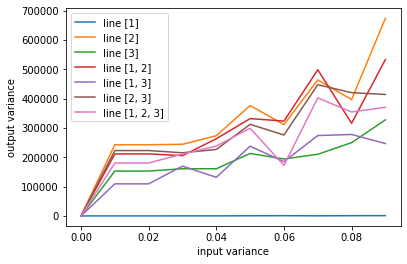

In [9]:
#Plot the outcomes
t=0
plot_matrix[:,1] = plot_matrix[:,2]
for arr in plot_matrix:
    plt.plot(percentages, arr, label="line " + str(features[t]))
    t+=1
plt.xlabel('input variance')
plt.ylabel('output variance')
plt.legend()
# plt.savefig(path + experiment_name + str(timestamp) + '.png')
plt.show()


In [10]:
# random.seed(50)
# test_indices = np.unique(np.array([random.randint(0,npdata.shape[0]-1) for k in range(0,1000)]))
# # print(test_indices)
# test_data = npdata[test_indices, :]
# test_X = test_data[:,1:]
# real_mpg = test_data[:, 0]
# training_data = np.delete(npdata, test_indices, axis=0)
# training_X = training_data[:, 1:]
# training_y = training_data[:, 0]
# # clf = linear_model.LinearRegression()
# # clf = tree.DecisionTreeRegressor(random_state=42)
# clf = neural_network.MLPRegressor(random_state=42, max_iter=500)
# clf = clf.fit(training_X, training_y)
# prediction_mpg = clf.predict(test_X)
# print(prediction_mpg-real_mpg)

